In [1]:
import tifffile as tiff
import numpy as np
# import cv2
# from skimage.io import imread, imshow
import rasterio
from rasterio import features
import os, glob
import geopandas as gpd
from matplotlib import pyplot as plt
from pathlib import Path
import cv2 as cv
from skimage.morphology import square, erosion, dilation

# import solaris

In [2]:
rasterio.open('tiffimg3.tif').meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 36100,
 'height': 45163,
 'count': 3,
 'crs': CRS.from_epsg(32737),
 'transform': Affine(0.06646999716758728, 0.0, 537722.4375,
        0.0, -0.06646999716758728, 9353192.0)}

<h3>the below file is the label in geojson format . CRS stands for coordinate reference systems. and the epsg for European Petroleum Survey Group;
there are two type of coordinate systems we use in everyday life. and they are :

    Geographic coordinate systems use the three-dimensional model of the earth (ellipsoid) to define specific locations on the surface to create a grid. When we refer to locations using “longitude” (East/West measurement) and “latitude” (North/South measurement), we are using geographic coordinates.

    Projected coordinate systems are like geographic coordinate systems, but one step removed. A projected coordinate system is also a grid used as a reference for locations on the planet, but it’s a translation of the three-dimensional grid onto a two-dimensional plane (like a paper map or screen). A projected coordinate system defines how to draw geographic locations from the three-dimensional model on a two-dimensional plane
    
 

In [3]:
k=gpd.read_file("grid_001.geojson")
k.crs

{'init': 'epsg:4326'}

<h3>The two most relevant coordinate systems  on web mapping are EPSG:4326 (WGS84) and EPSG:3857 (Pseudo-Mercator)
    
     #EPSG:4326 (WGS84):  The World Geodetic System of 1984 is the geographic coordinate system (the three-dimensional one) used by GPS to express locations on the earth. WGS84 is the defined coordinate system for GeoJSON, as longitude and latitude in decimal degrees. For the most part, when you describe a lon/lat coordinate location, it’s based on the EPSG:4326 coordinate system.   and there is no way we can visualize 
    
    #EPSG:3857(Pseudo-Mercator): The projected Pseudo-Mercator coordinate system takes the WGS84 coordinate system and projects it onto a square. (This projection is also called Spherical Mercator or Web Mercator.) But not all of it – the bounds of Pseudo-Mercator are limited to approximately 85.06º North and South latitude. this projection is used by maps that we see on mobile or web pages. EPSG: are great for visualising on computers but not reliable for analysis and storage .
    This is why data is stored in EPSG:4326, but display it in EPSG:3857
    
        

In [4]:
import geopandas as gpd
data = gpd.read_file("grid_1_shp.shp")
data.crs


{'init': 'epsg:4326'}

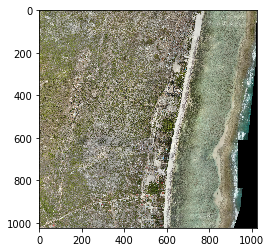

In [5]:
size=1024
# 
img1 = tiff.imread("tiffimg3.tif")
img1 = cv.resize(img1, (size, size))
plt.imshow(img1)
# img1.plot(figsize=(10,10))


In [6]:
label_df = gpd.read_file("grid_001.geojson")
label_df = label_df[label_df['geometry'].isna() != True] 

<h4>the buildings to be segmented in this task are in 3 categories, completed, incomplete and foundation. The original task here was to segment the buildings and detected which of the buildings are completed, underconstruction or only foundation was laid . And the below visualization will tell how the data is distributed with respect to the same. 
    
    so the end task is segmentation and detection


In [7]:
completed= label_df[label_df['condition'] == 'Complete'] 
foundation= label_df[label_df['condition'] == 'Foundation']
incompleted= label_df[label_df['condition'] == 'Incomplete']


In [8]:
incompleted['geometry']

6       POLYGON ((39.29558 -5.72940, 39.29560 -5.72940...
35      POLYGON ((39.29594 -5.72502, 39.29593 -5.72510...
58      POLYGON ((39.29610 -5.73098, 39.29619 -5.73095...
73      POLYGON ((39.29621 -5.73108, 39.29623 -5.73108...
138     POLYGON ((39.30575 -5.73513, 39.30586 -5.73512...
                              ...                        
4416    POLYGON ((39.29644 -5.72783, 39.29636 -5.72784...
4418    POLYGON ((39.29666 -5.72758, 39.29668 -5.72770...
4420    POLYGON ((39.29639 -5.72749, 39.29649 -5.72748...
4432    POLYGON ((39.29676 -5.72751, 39.29679 -5.72761...
4433    POLYGON ((39.29677 -5.72751, 39.29685 -5.72748...
Name: geometry, Length: 775, dtype: geometry

In [9]:
c=completed["condition"].count()
i=incompleted["condition"].count()
f=foundation["condition"].count()
print("the number of buildings completed:",c)
print("the number of buildings incomplete:",i)
print("the number of buildings with only foundation constructed:",f)

the number of buildings completed: 2832
the number of buildings incomplete: 775
the number of buildings with only foundation constructed: 824


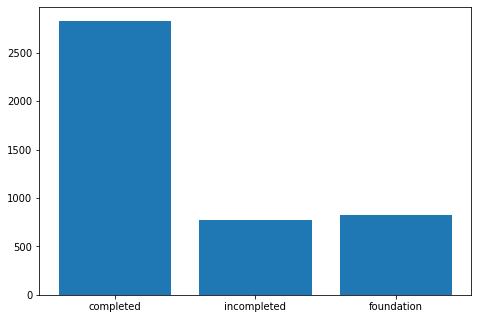

In [10]:
# import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
lang = ['completed','incompleted','foundation']
students = [c,i,f]
ax.bar(lang,students)
plt.show()

<h3> from the above bar graph we can see the number of buildings completed is relatively more than those which are incomplete and buildings whose foundations are only laid. 
    for further visualization below.

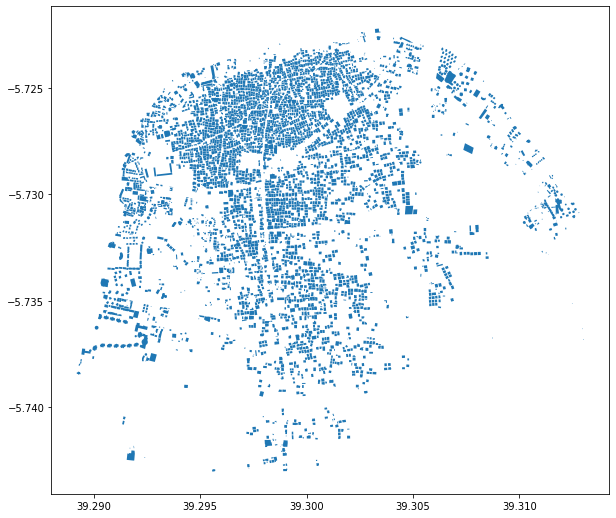

In [11]:
label_df.plot(figsize=(10,10))

<h3> the above plot is composed of all the polygon comprising of completed, incomplete and foundation . 

<h3>the below plot represents the label for only those building that are incomplete in the entire dataset

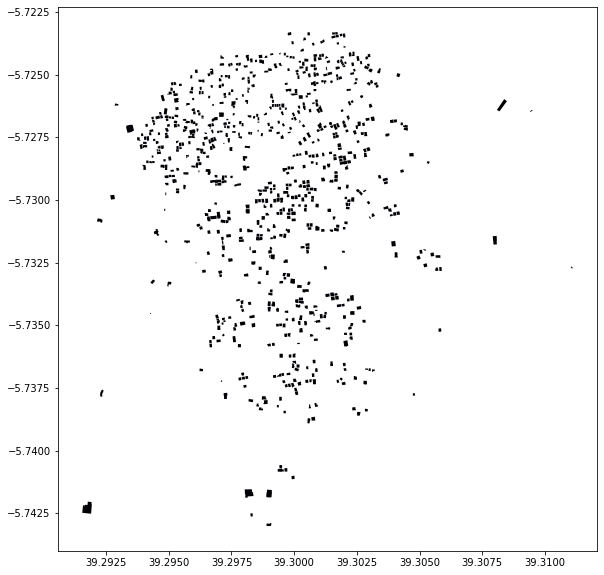

In [12]:
incompleted.plot(incompleted['condition']=='incompleted', cmap='inferno',figsize=(10,10))

<h3>the below figure represnt polygons that represents the completed buildings in the entrie dataset

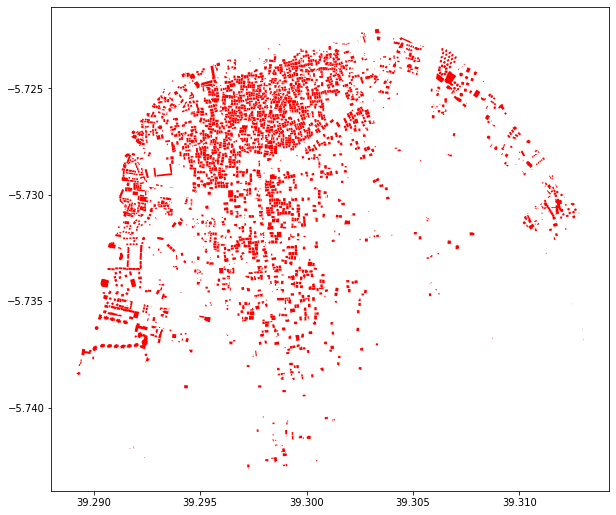

In [13]:
c=completed.plot(completed['condition']=='Complete', cmap='prism',figsize=(10,10))

<h3>the below figure represnt polygons that represents the buildings wiht only foundataion laid in the entrie dataset

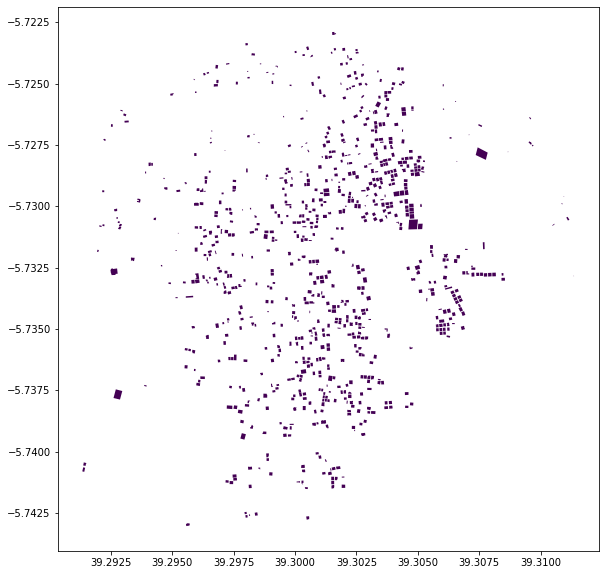

In [14]:
f=foundation.plot(foundation['condition']=='foundation', cmap='viridis',figsize=(10,10))

In [15]:
# ### import matplotlib as mpl
# import matplotlib.pyplot as plt

# def plot_colorMaps(cmap):

#     fig, ax = plt.subplots(figsize=(4,0.4))
#     col_map = plt.get_cmap(cmap)
#     mpl.colorbar.ColorbarBase(ax, cmap=col_map, orientation = 'horizontal')

#     plt.show()

# for cmap_id in plt.colormaps():
#     print(cmap_id)
#     plot_colorMaps(cmap_id)


<h4>here we are going to calculate the area that all the buildings cover in geojson file. the resolution of the image used is 7cm(ie for every pixel in the image it corresponds to 7cm in the ground )

In [16]:

k=label_df['geometry'].to_crs({'init': 'epsg:32737'}).map(lambda p: p.area / 10**6).sum()
##the epsg:327737 should corresponds to the image which is done in cell [2] above.

<h3>for the original task the data was collected from 13 regions of one AOI and the below geojson represents the label for all those 13 regions.(for the record i have done work with only one geotiff image and its respective geojson label) i collected the geojson masks for the other 12 images and did some visualization. 

In [17]:
l36= gpd.read_file("grid_036.geojson")
l42= gpd.read_file("grid_042.geojson")
l49= gpd.read_file("grid_049.geojson")
l51= gpd.read_file("grid_051.geojson")
l23= gpd.read_file("grid_023.geojson")
l43= gpd.read_file("grid_043.geojson")
l50= gpd.read_file("grid_050.geojson")
l58= gpd.read_file("grid_058.geojson")
l35= gpd.read_file("grid_035.geojson")
l29= gpd.read_file("grid_029.geojson")
l22= gpd.read_file("grid_022.geojson")
l28= gpd.read_file("grid_028.geojson")

In [18]:

a36=l36['geometry'].to_crs({'init': 'epsg:32737'}).map(lambda p: p.area / 10**6).sum()
print(a36)
t=a36+k
a42=l42['geometry'].to_crs({'init': 'epsg:32737'}).map(lambda p: p.area / 10**6).sum()
print(a42)
t=t+a42
a49=l49['geometry'].to_crs({'init': 'epsg:32737'}).map(lambda p: p.area / 10**6).sum()
print(a49)
t=t+a49
a51=l51['geometry'].to_crs({'init': 'epsg:32737'}).map(lambda p: p.area / 10**6).sum()
print(a51)
t=t+a51
a23=l23['geometry'].to_crs({'init': 'epsg:32737'}).map(lambda p: p.area / 10**6).sum()
print(a23)
t=t+a23
a43=l43['geometry'].to_crs({'init': 'epsg:32737'}).map(lambda p: p.area / 10**6).sum()
print(a43)
t=t+a43
a50=l50['geometry'].to_crs({'init': 'epsg:32737'}).map(lambda p: p.area / 10**6).sum()
print(a50)
t=t+a50
a58=l58['geometry'].to_crs({'init': 'epsg:32737'}).map(lambda p: p.area / 10**6).sum()
print(a58)
t=t+a58
a35=l35['geometry'].to_crs({'init': 'epsg:32737'}).map(lambda p: p.area / 10**6).sum()
print(a35)
t=t+a35
a29=l29['geometry'].to_crs({'init': 'epsg:32737'}).map(lambda p: p.area / 10**6).sum()
print(a29)
t=t+a29
a22=l22['geometry'].to_crs({'init': 'epsg:32737'}).map(lambda p: p.area / 10**6).sum()
print(a22)
t=t+a22
a28=l28['geometry'].to_crs({'init': 'epsg:32737'}).map(lambda p: p.area / 10**6).sum()
print(a28)
t=t+a28
print("the total area is :",t)

0.1119093967868261
0.041053640247340636
0.014580316997002794
0.005616706345057197
0.08156842346074525
0.1894018161488623
0.11986131695461066
0.0030485062056721944
0.1109956379229118
0.16195729266306072
0.043356325791443655
0.04115857022169486
the total area is : 1.6223677299266892


<h4>this is the area that is covered by buildings irrespective of their conditions ie 1.62KM SQ.

<h3>the total area under study was 102.61 km sq. and out of that only 1.62 km sq is covered by buildings . 
that is around 1.57% of the region is covered by bulidings. 

the above matrix can be used to study region before we start to work with the modelling part.